<center>
<img src="../../img/ods_stickers.jpg" />
    
## [mlcourse.ai](https://mlcourse.ai) – Open Machine Learning Course 
### <center> Author: Aleksandr Korotkov, ODS Slack krotix
    
## <center> Tutorial
### <center> Yet another ensemble learning helper

![title](https://static1.squarespace.com/static/57dc396a03596e8da9fe6b73/t/57eef283b3db2ba633355a07/1480477568336/UBC_Bands.jpg)
<center> Image by Brian Hawkes

### What does ensemble learning mean?

**Ensemble learning** - this is a method use multiple learning algorithms to obtain(I'd say usually it so, but not in any cases) better predictive performance than could be obtained from any of the constituent learning algorithms alone.

The most common techniques are:
* boosting
* bagging
* stacking

We are looking at some meta-algorithms to make an ensemble, which can improve the performance of a metric, get a better speed of experimenting and simplify code.

I would like to show several libraries for ensambling in python:
* https://github.com/rasbt/mlxtend.git - a library of useful tools for the day-to-day data science tasks.
* https://github.com/flennerhag/mlens - a library for high performance ensemble learning.
* https://github.com/Menelau/DESlib - an easy-to-use ensemble learning library focused on the implementation of the state-of-the-art techniques for dynamic classifier and ensemble selection.

We will understand the use of different libraries on a simple example and plot of decision boundaries to visualize differences.

### <center> Installation

In [14]:
!pip install mlxtend
!pip install mlens
!pip install deslib

Prepare our notebook to further experiments:
* import all libraries
* load example data and split it
* make classifiers for comparison
* create utility function

We'll use Iris dataset as an example.

Features
* Sepal length
* Sepal width
* Petal length
* Petal width

Number of samples: 150.

Target variable (discrete): {50x Setosa, 50x Versicolor, 50x Virginica}

In [9]:
#common libraries
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import itertools

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from mlxtend.classifier import EnsembleVoteClassifier, StackingClassifier, StackingCVClassifier
from mlxtend.data import iris_data
from mlxtend.plotting import plot_decision_regions

from sklearn.metrics import accuracy_score
from mlens.ensemble import SuperLearner, Subsemble, BlendEnsemble, SequentialEnsemble

from deslib.dcs import MCB
from deslib.des.knora_e import KNORAE
from deslib.static import StaticSelection

import warnings
warnings.filterwarnings('ignore')

In [2]:
# random seed
seed = 10

# Loading example data
X, y = iris_data()
X = X[:,[0, 2]]

# split the data into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,
                                                    random_state=seed)

In [3]:
# Initializing several classifiers
clf1 = LogisticRegression(random_state=seed)
clf2 = RandomForestClassifier(random_state=seed)
clf3 = SVC(random_state=seed, probability=True)

In [22]:
def compare(classifier, X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test):
    # Plotting Decision Regions
    gs = gridspec.GridSpec(2, 2)
    fig = plt.figure(figsize=(10, 8))
    
    # Label for our classifiers
    labels = ['Logistic Regression',
              'Random Forest',
              'RBF kernel SVM',
              'Ensemble']
    
    classifiers = [clf1, clf2, clf3, classifier]
    for clf, label, grid in zip(classifiers,
                         labels,
                         itertools.product([0, 1],
                         repeat=2)):
        clf.fit(X, y)
        ax = plt.subplot(gs[grid[0], grid[1]])
        fig = plot_decision_regions(X=X, y=y,
                                    clf=clf, legend=2)
        plt.title(label)
        
    plt.show()
    
    for clf, label in zip(classifiers,labels):
        print(label)
        print(classification_report(clf.predict(X_test), y_test))

### <center> Mlxtend

Mlxtend classes:
* EnsembleVoteClassifier - a majority voting helper for classification
* StackingClassifier - an ensemble-learning meta-classifier for stacking
* StackingCVClassifier - an ensemble-learning meta-classifier for stacking using cross-validation to prepare the inputs for the level-2 classifier to prevent overfitting

Let's discover how we can use it by examples.

#### EnsembleVoteClassifier

To get more information look https://rasbt.github.io/mlxtend/user_guide/classifier/EnsembleVoteClassifier/

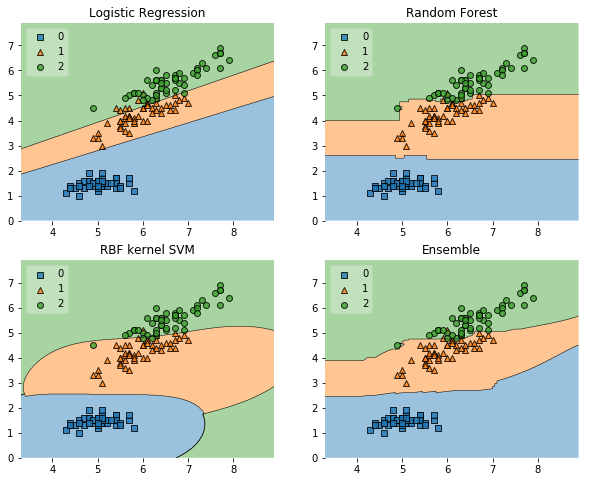

Logistic Regression
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        11
          1       0.73      1.00      0.85        11
          2       1.00      0.75      0.86        16

avg / total       0.92      0.89      0.90        38

Random Forest
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        11
          1       0.93      1.00      0.97        14
          2       1.00      0.92      0.96        13

avg / total       0.98      0.97      0.97        38

RBF kernel SVM
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        11
          1       0.93      0.93      0.93        15
          2       0.92      0.92      0.92        12

avg / total       0.95      0.95      0.95        38

Ensemble
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        11
          1       0.93      1.0

In [29]:
eclf = EnsembleVoteClassifier(clfs=[clf1, clf2, clf3],
                              weights=[2, 1, 1], voting='soft')
compare(eclf)

#### StackingClassifier

To get more information look https://rasbt.github.io/mlxtend/user_guide/classifier/StackingClassifier/

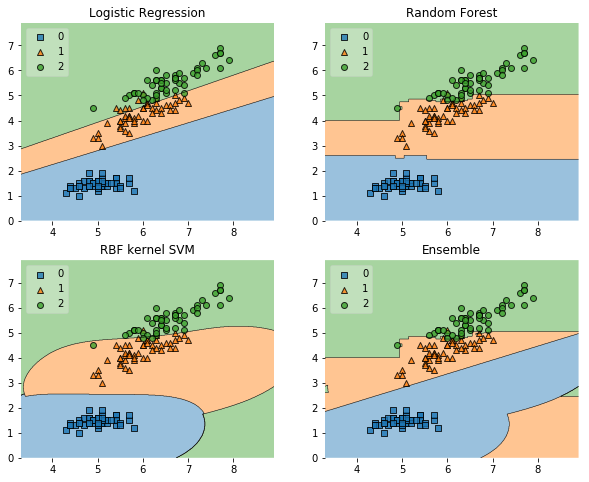

Logistic Regression
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        11
          1       0.73      1.00      0.85        11
          2       1.00      0.75      0.86        16

avg / total       0.92      0.89      0.90        38

Random Forest
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        11
          1       0.93      1.00      0.97        14
          2       1.00      0.92      0.96        13

avg / total       0.98      0.97      0.97        38

RBF kernel SVM
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        11
          1       0.93      0.93      0.93        15
          2       0.92      0.92      0.92        12

avg / total       0.95      0.95      0.95        38

Ensemble
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        11
          1       0.93      1.0

In [32]:
sclf = StackingClassifier(classifiers=[clf1, clf2, clf3], 
                          meta_classifier=LogisticRegression())
compare(sclf)

#### StackingCVClassifier

To get more information look https://rasbt.github.io/mlxtend/user_guide/classifier/StackingCVClassifier/

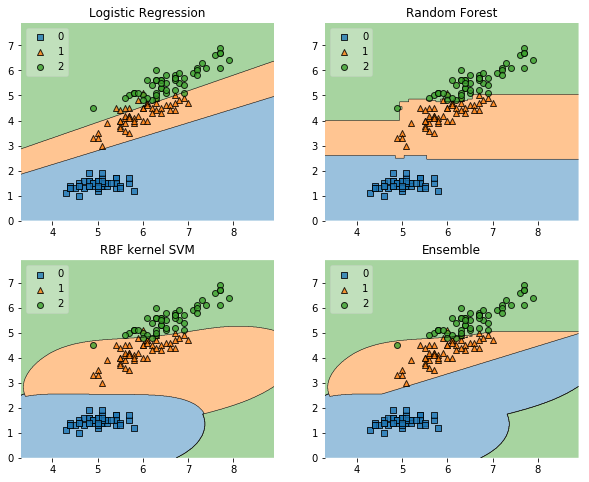

Logistic Regression
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        11
          1       0.73      1.00      0.85        11
          2       1.00      0.75      0.86        16

avg / total       0.92      0.89      0.90        38

Random Forest
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        11
          1       0.93      1.00      0.97        14
          2       1.00      0.92      0.96        13

avg / total       0.98      0.97      0.97        38

RBF kernel SVM
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        11
          1       0.93      0.93      0.93        15
          2       0.92      0.92      0.92        12

avg / total       0.95      0.95      0.95        38

Ensemble
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        11
          1       0.93      0.9

In [33]:
scvclf = StackingCVClassifier(classifiers=[clf1, clf2, clf3], 
                            meta_classifier=LogisticRegression())
compare(scvclf)

## <center> mlens

Mlens has several useful classes:
* SuperLearner - a stacking ensemble 
* Subsemble - a supervised ensemble algorithm that uses subsets of the full data to fit a layer
* BlendEnsemble - a supervised ensemble uses the meta-learner to estimate the prediction matrix 
* SequentialEnsemble - a multi-layer ensemble learning

#### SuperLearner

To get more information follow the link http://ml-ensemble.com/info/start/ensembles.html#super-learner


Fitting 2 layers
Processing layer-1             done | 00:00:00
Processing layer-2             done | 00:00:00
Fit complete                        | 00:00:00

Predicting 2 layers
Processing layer-1             done | 00:00:00
Processing layer-2             done | 00:00:00
Predict complete                    | 00:00:00


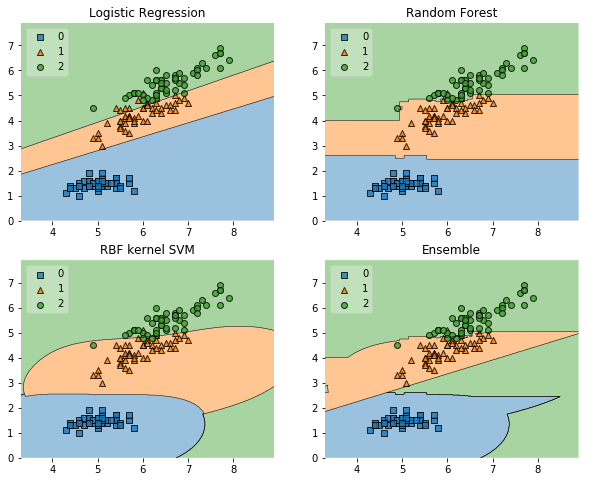

Logistic Regression
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        11
          1       0.73      1.00      0.85        11
          2       1.00      0.75      0.86        16

avg / total       0.92      0.89      0.90        38

Random Forest
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        11
          1       0.93      1.00      0.97        14
          2       1.00      0.92      0.96        13

avg / total       0.98      0.97      0.97        38

RBF kernel SVM
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        11
          1       0.93      0.93      0.93        15
          2       0.92      0.92      0.92        12

avg / total       0.95      0.95      0.95        38

Ensemble

Predicting 2 layers
Processing layer-1             done | 00:00:00
Processing layer-2             done | 00:00:00
Predict complete       

In [44]:
sl = SuperLearner(folds=5, random_state=seed, verbose=2)

# Build the first layer
sl.add([clf1, clf2, clf3])
# Attach the final meta-estimator
sl.add_meta(LogisticRegression())

compare(sl)

#### Subsemble

To get more information follow the link http://ml-ensemble.com/info/start/ensembles.html#subsemble


Fitting 2 layers
Processing layer-1             done | 00:00:00
Processing layer-2             done | 00:00:00
Fit complete                        | 00:00:00

Predicting 2 layers
Processing layer-1             done | 00:00:00
Processing layer-2             done | 00:00:00
Predict complete                    | 00:00:01


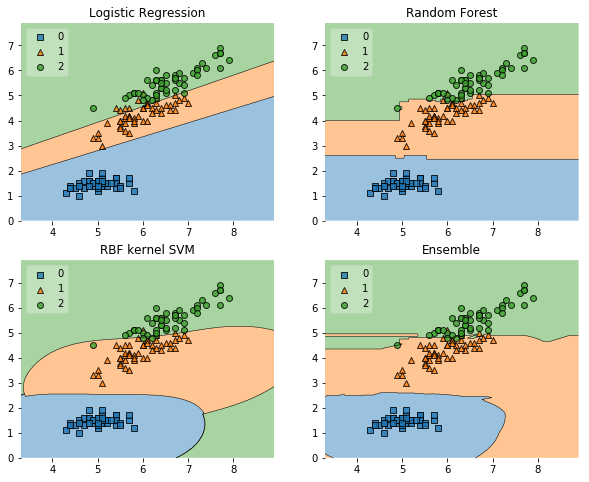

Logistic Regression
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        11
          1       0.73      1.00      0.85        11
          2       1.00      0.75      0.86        16

avg / total       0.92      0.89      0.90        38

Random Forest
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        11
          1       0.93      1.00      0.97        14
          2       1.00      0.92      0.96        13

avg / total       0.98      0.97      0.97        38

RBF kernel SVM
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        11
          1       0.93      0.93      0.93        15
          2       0.92      0.92      0.92        12

avg / total       0.95      0.95      0.95        38

Ensemble

Predicting 2 layers
Processing layer-1             done | 00:00:00
Processing layer-2             done | 00:00:00
Predict complete       

In [35]:
sub = Subsemble(partitions=3, random_state=seed, verbose=2, shuffle=True)

# Build the first layer
sub.add([clf1, clf2, clf3])
sub.add_meta(SVC())

compare(sub)

#### BlendEnsemble

To get more information follow the link http://ml-ensemble.com/info/start/ensembles.html#blend-ensemble


Fitting 2 layers
Processing layer-1             done | 00:00:00
Processing layer-2             done | 00:00:00
Fit complete                        | 00:00:00

Predicting 2 layers
Processing layer-1             done | 00:00:00
Processing layer-2             done | 00:00:00
Predict complete                    | 00:00:01


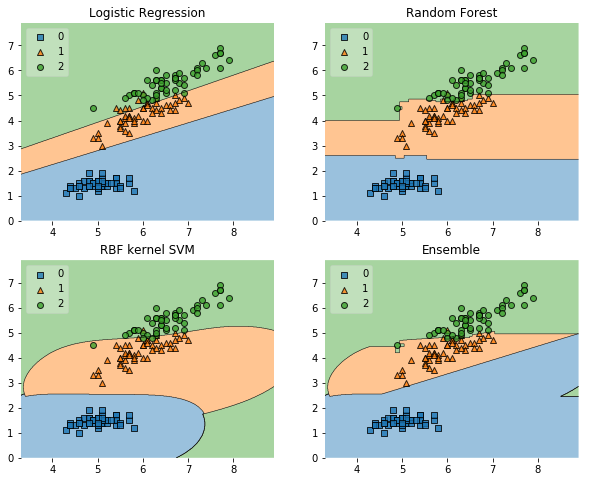

Logistic Regression
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        11
          1       0.73      1.00      0.85        11
          2       1.00      0.75      0.86        16

avg / total       0.92      0.89      0.90        38

Random Forest
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        11
          1       0.93      1.00      0.97        14
          2       1.00      0.92      0.96        13

avg / total       0.98      0.97      0.97        38

RBF kernel SVM
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        11
          1       0.93      0.93      0.93        15
          2       0.92      0.92      0.92        12

avg / total       0.95      0.95      0.95        38

Ensemble

Predicting 2 layers
Processing layer-1             done | 00:00:00
Processing layer-2             done | 00:00:00
Predict complete       

In [36]:
be = BlendEnsemble(test_size=0.7, random_state=seed, verbose=2, shuffle=True)

# Build the first layer
be.add([clf1, clf2, clf3])
be.add_meta(LogisticRegression())

compare(be)

#### SequentialEnsemble

To get more information follow the link http://ml-ensemble.com/info/start/ensembles.html#sequential-ensemble

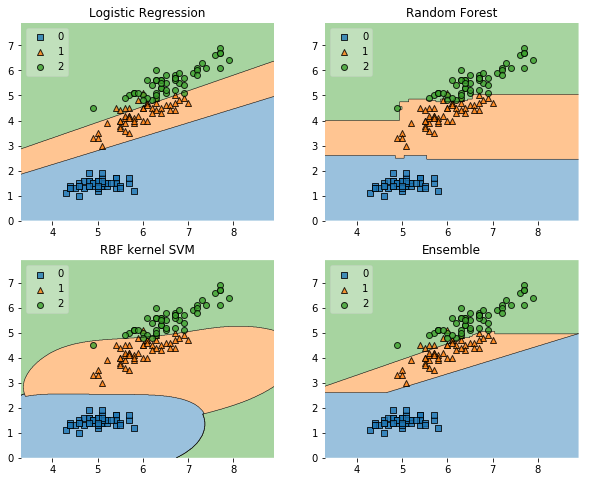

Logistic Regression
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        11
          1       0.73      1.00      0.85        11
          2       1.00      0.75      0.86        16

avg / total       0.92      0.89      0.90        38

Random Forest
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        11
          1       0.93      1.00      0.97        14
          2       1.00      0.92      0.96        13

avg / total       0.98      0.97      0.97        38

RBF kernel SVM
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        11
          1       0.93      0.93      0.93        15
          2       0.92      0.92      0.92        12

avg / total       0.95      0.95      0.95        38

Ensemble
             precision    recall  f1-score   support

        0.0       1.00      1.00      1.00        11
        1.0       0.73      1.0

In [38]:
se = SequentialEnsemble(random_state=seed, shuffle=True)

# The initial layer is a blended layer, same as a layer in the BlendEnsemble
se.add('blend',
             [clf1, clf2])

# The second layer is a stacked layer, same as a layer of the SuperLearner
se.add('stack', [clf1, clf3])

# The meta estimator is added as in any other ensemble
se.add_meta(SVC())

compare(se)

## <center> DESlib

DESlib has 23 algorithms different ensemble technics split into 3 group:
* Dynamic Ensemble Selection(DES)
* Dynamic Classifier Selection(DCS)
* Baseline methods(static)

let's try some of them from different groups:
* KNORAE - Dynamic Ensemble Selection(DES) algorithm based on k-Nearest Oracle-Eliminate(KNORA-E)
* MCB - Dynamic Classifier Selection(DCS) algorithm based on Multiple Classifier Behaviour (MCB)
* StaticSelection - Baseline method(static) for an ensemble model that selects N classifiers with the best performance

To get more information follow the link https://deslib.readthedocs.io/en/latest/api.html

#### KNORAE 
To get more information follow the link https://deslib.readthedocs.io/en/latest/modules/des/knora_e.html

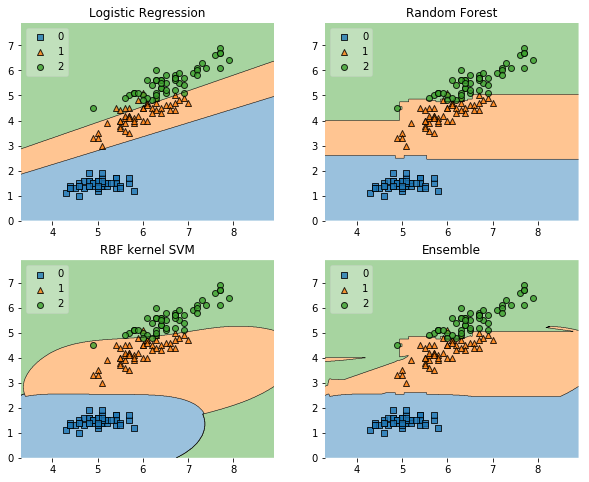

Logistic Regression
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        11
          1       0.73      1.00      0.85        11
          2       1.00      0.75      0.86        16

avg / total       0.92      0.89      0.90        38

Random Forest
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        11
          1       0.93      1.00      0.97        14
          2       1.00      0.92      0.96        13

avg / total       0.98      0.97      0.97        38

RBF kernel SVM
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        11
          1       0.93      0.93      0.93        15
          2       0.92      0.92      0.92        12

avg / total       0.95      0.95      0.95        38

Ensemble
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        11
          1       0.93      1.0

In [40]:
kne = KNORAE([clf1, clf2, clf3])
compare(kne)

#### MCB

To get more information follow the link  https://deslib.readthedocs.io/en/latest/modules/dcs/mcb.html

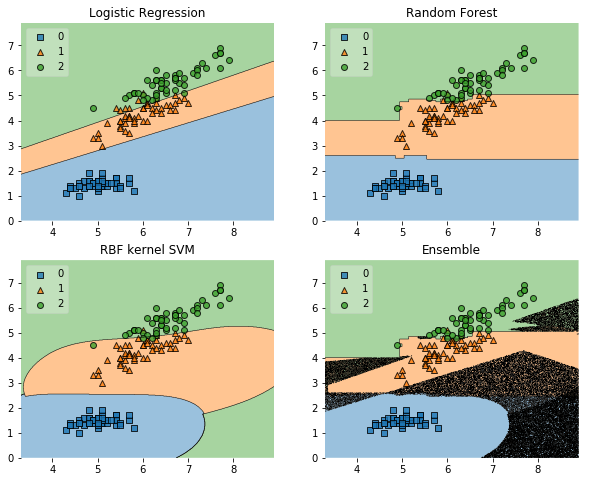

Logistic Regression
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        11
          1       0.73      1.00      0.85        11
          2       1.00      0.75      0.86        16

avg / total       0.92      0.89      0.90        38

Random Forest
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        11
          1       0.93      1.00      0.97        14
          2       1.00      0.92      0.96        13

avg / total       0.98      0.97      0.97        38

RBF kernel SVM
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        11
          1       0.93      0.93      0.93        15
          2       0.92      0.92      0.92        12

avg / total       0.95      0.95      0.95        38

Ensemble
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        11
          1       0.93      1.0

In [42]:
mcb = MCB([clf1, clf2, clf3])
compare(mcb)

#### StaticSelection

To get more information follow the link  https://deslib.readthedocs.io/en/latest/modules/static/static_selection.html

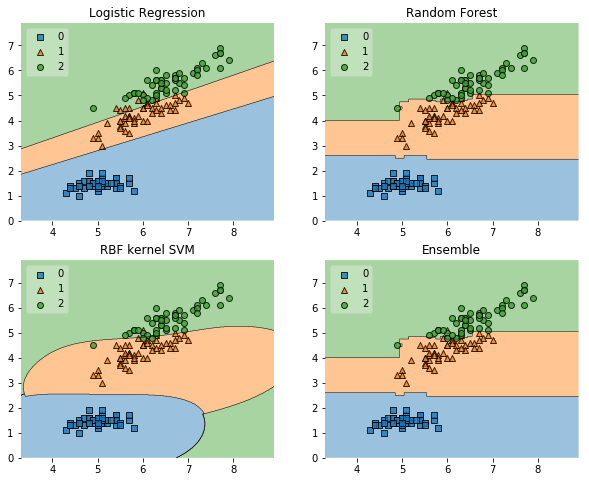

Logistic Regression
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        11
          1       0.73      1.00      0.85        11
          2       1.00      0.75      0.86        16

avg / total       0.92      0.89      0.90        38

Random Forest
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        11
          1       0.93      1.00      0.97        14
          2       1.00      0.92      0.96        13

avg / total       0.98      0.97      0.97        38

RBF kernel SVM
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        11
          1       0.93      0.93      0.93        15
          2       0.92      0.92      0.92        12

avg / total       0.95      0.95      0.95        38

Ensemble
             precision    recall  f1-score   support

        0.0       1.00      1.00      1.00        11
        1.0       0.93      1.0

In [43]:
ss = StaticSelection([clf1, clf2, clf3])
compare(ss)

### <center> Summary
    
We looked at different algorithms and different libraries, which might save a lot of time when you need to use ensemble technic. Ensemble modeling is a powerful way to improve the performance of your machine learning models. If you wish to be on the top of the leaderboard in any machine learning competition or want to improve models you are working on – ensemble is the way to go.
    
P.S. There is no silver bullet... try different tools and algorithms.

#### Resources: 
* https://en.wikipedia.org/wiki/Ensemble_learning
* https://rasbt.github.io/mlxtend/USER_GUIDE_INDEX/
* https://www.dataquest.io/blog/introduction-to-ensembles/
* https://www.slideshare.net/SessionsEvents/erin-ledell-machine-learning-scientist-h2oai-at-mlconf-atl-2016
* https://medium.com/@rrfd/boosting-bagging-and-stacking-ensemble-methods-with-sklearn-and-mlens-a455c0c982de
* https://www.analyticsvidhya.com/blog/2018/06/comprehensive-guide-for-ensemble-models/